In [1]:
import os
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

2024-10-17 12:17:13.856322: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 12:17:14.863274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 12:17:15.372160: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 12:17:15.509422: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 12:17:16.307150: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#하이퍼파라미터
INPUT_SIZE = 128
BATCH_SIZE = 64
EPOCH = 10
FILTER_SIZE = 3
NUM_FILTERS = 32
MAXPOOL_SIZE = 2

In [3]:
image_dir = '/home/elicer/FIshing_vessel/fishing_vessel_imgdata/train'

In [23]:
#폴더 형식으로 구분된 이미지 불러오기
#director, dir 경로 변경 필요
train_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)
test_generator = ImageDataGenerator(rescale = 1./255)

train_data = train_generator.flow_from_directory(
    directory = '/home/elicer/FIshing_vessel/fishing_vessel_imgdata/train',
    shuffle = True,
    target_size = (INPUT_SIZE,INPUT_SIZE),
    class_mode = 'categorical',
    batch_size = BATCH_SIZE,
    subset = 'training'
)

val_data = train_generator.flow_from_directory(
    directory = '/home/elicer/FIshing_vessel/fishing_vessel_imgdata/train',
    shuffle = True,
    target_size = (INPUT_SIZE,INPUT_SIZE),
    class_mode = 'categorical',
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

test_data = test_generator.flow_from_directory(
    directory = '/home/elicer/FIshing_vessel/fishing_vessel_imgdata/test',
    shuffle = False,
    target_size = (INPUT_SIZE,INPUT_SIZE),
    class_mode = 'categorical',
    batch_size = BATCH_SIZE
)


Found 1277 images belonging to 2 classes.
Found 319 images belonging to 2 classes.
Found 53 images belonging to 1 classes.


Image Path: /home/elicer/FIshing_vessel/fishing_vessel_imgdata/train/2. 중국어선/1. 타망, Predicted Class: 2. 중국어선
Image Path: /home/elicer/FIshing_vessel/fishing_vessel_imgdata/train/1. 국내어선/2. 저인망, Predicted Class: 1. 국내어선
Image Path: /home/elicer/FIshing_vessel/fishing_vessel_imgdata/train/2. 중국어선/3. 범장망, Predicted Class: 2. 중국어선
Image Path: /home/elicer/FIshing_vessel/fishing_vessel_imgdata/train/2. 중국어선/4. 등광조망, Predicted Class: 2. 중국어선


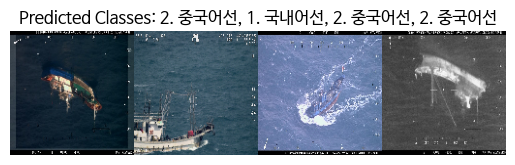

In [24]:
# 이미지 시각화 및 경로 출력
images, targets = next(train_data)

# 출력할 이미지 수
num_images_to_display = 4
predicted_classes = [np.argmax(x) for x in targets[:num_images_to_display]]

# 클래스 이름 딕셔너리
class_names = train_data.class_indices  # 자동으로 클래스 인덱스를 생성합니다.
class_names = {v: k for k, v in class_names.items()}  # 반전

# 각 이미지의 파일 경로 출력
for i in range(num_images_to_display):
    # 클래스 인덱스에 따른 클래스 이름
    class_name = class_names[predicted_classes[i]]
    class_dir = os.path.join(image_dir, class_name)
    
    # class_dir 내의 이미지 파일 리스트 가져오기
    image_files = os.listdir(class_dir)
    # 특정 이미지의 파일 경로 가져오기
    # 이미지 파일이 제대로 매핑되지 않을 경우 인덱스를 변경해야 할 수 있음
    image_path = os.path.join(class_dir, image_files[i])  # 단일 이미지 파일에 대한 경로 가져오기
    
    print(f"Image Path: {image_path}, Predicted Class: {class_name}")

# 이미지 시각화
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis=1))
plt.axis('off')  # 축 제거
plt.title("Predicted Classes: " + ", ".join([class_names[pred] for pred in predicted_classes]))  # 제목 추가
plt.rcParams['font.family'] ='NanumBarunGothic'
plt.show()

In [25]:
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(NUM_FILTERS, (FILTER_SIZE,FILTER_SIZE), activation = 'relu', kernel_initializer = HeNormal(), input_shape = (INPUT_SIZE,INPUT_SIZE,3)),
    MaxPooling2D((MAXPOOL_SIZE,MAXPOOL_SIZE)),
    Dropout(0.2),

    Conv2D(NUM_FILTERS, (FILTER_SIZE,FILTER_SIZE), activation = 'relu'),
    MaxPooling2D((MAXPOOL_SIZE,MAXPOOL_SIZE)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),

    Dense(2, activation = 'softmax')
])


model.summary()


/home/elicer/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,930 (14.10 MB)

 Trainable params: 3,696,930 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
targets.shape

(64, 2)

In [27]:
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 모델 학습(validation_data=validaion_set)
history = model.fit(train_data, epochs = EPOCH, validation_data = val_data)

/home/elicer/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 515ms/step - accuracy: 0.6048 - loss: 4.2362 - val_accuracy: 0.7179 - val_loss: 0.6258
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 0.6936 - loss: 0.6363 - val_accuracy: 0.7085 - val_loss: 0.6531
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 322ms/step - accuracy: 0.7058 - loss: 0.5870 - val_accuracy: 0.6991 - val_loss: 0.6383
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.7128 - loss: 0.5785 - val_accuracy: 0.7241 - val_loss: 0.6149
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.7609 - loss: 0.5409 - val_accuracy: 0.7241 - val_loss: 0.5858
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.7659 - loss: 0.5202 - val_accuracy: 0.7367 - val_loss: 0.5707
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.7800 - loss: 0.4924 - val_accuracy: 0.7273 - val_loss: 0.5715
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.7764 - loss: 0.4902 - val_accuracy:

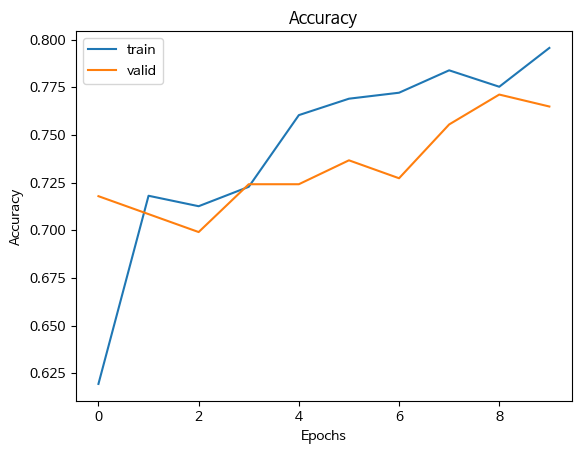

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

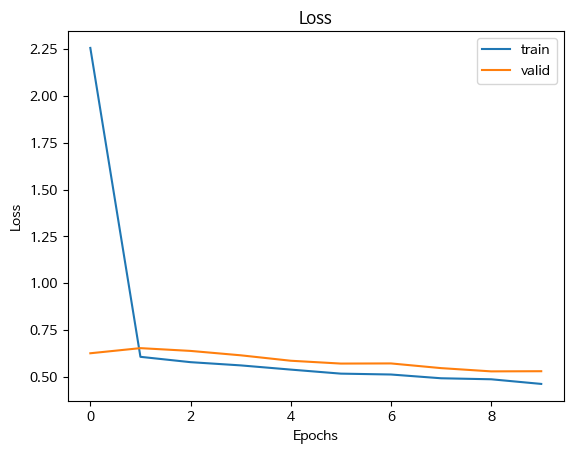

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend(['train', 'valid'])
plt.show()

In [30]:
path = '/home/elicer/FIshing_vessel/fishing_vessel_imgdata/test/' # 폴더 경로
os.chdir(path) # 해당 폴더로 이동
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음

In [31]:
model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


array([[0.46627083, 0.5337292 ],
       [0.24078889, 0.75921106],
       [0.13934505, 0.8606549 ],
       [0.18352336, 0.8164767 ],
       [0.12582165, 0.8741784 ],
       [0.19628331, 0.80371666],
       [0.34840706, 0.6515929 ],
       [0.1364196 , 0.86358047],
       [0.16253893, 0.83746105],
       [0.23883902, 0.761161  ],
       [0.29507464, 0.70492536],
       [0.7270406 , 0.2729594 ],
       [0.393541  , 0.606459  ],
       [0.34057757, 0.65942246],
       [0.06663544, 0.9333645 ],
       [0.11848224, 0.8815178 ],
       [0.66631186, 0.33368808],
       [0.2743412 , 0.72565883],
       [0.23149586, 0.76850414],
       [0.19061564, 0.80938435],
       [0.2007161 , 0.7992839 ],
       [0.13274737, 0.86725265],
       [0.36436972, 0.63563025],
       [0.25825948, 0.74174047],
       [0.269474  , 0.730526  ],
       [0.11733718, 0.88266283],
       [0.28214926, 0.71785074],
       [0.35293725, 0.6470627 ],
       [0.25412247, 0.74587756],
       [0.13097042, 0.8690296 ],
       [0.

In [32]:
dimage_dir_ = '/home/elicer/FIshing_vessel/fishing_vessel_imgdata/test'

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


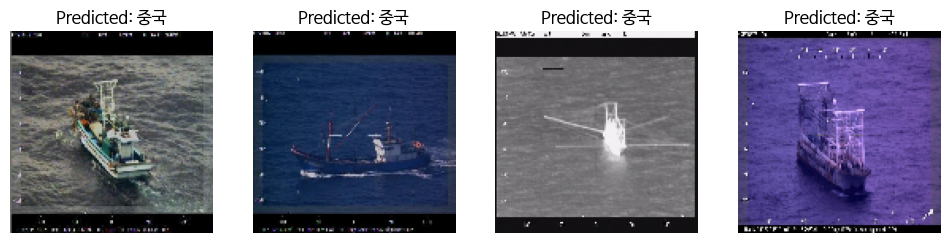

In [45]:

import matplotlib.pyplot as plt
import numpy as np

# test_data에서 배치로 이미지 및 레이블 불러오기
test_images, test_labels = next(test_data)

# 모델을 사용해 예측 수행
predictions = model.predict(test_images)

# 예측된 클래스 인덱스 추출
predicted_classes = np.argmax(predictions, axis=1)

# 클래스 이름 매핑
class_names = {0: '국내', 1: '중국'}

# 출력할 이미지 수 설정
num_images_to_display = 4

# 이미지 시각화 및 예측된 클래스 표시
plt.figure(figsize=(12, 12))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    
    # 이미지 표시
    plt.imshow(test_images[i])
    plt.axis('off')
    
    # 예측된 클래스 이름 표시
    predicted_class_name = class_names.get(predicted_classes[i], "Unknown")
    plt.title(f"Predicted: {predicted_class_name}")

# 시각화 출력
plt.show()


In [34]:
from sklearn.metrics import classification_report

# test_data에서 배치로 이미지 및 레이블 불러오기
test_images, test_labels = next(test_data)

# 예측 수행
predictions = model.predict(test_images)

# 예측된 클래스 인덱스 추출
predicted_classes = np.argmax(predictions, axis=1)

# test_labels의 형태가 1D 배열이 되도록 변환
if len(test_labels.shape) > 1:
    test_labels = np.argmax(test_labels, axis=1)

# classification report 생성
report = classification_report(test_labels, predicted_classes)
print('Classification Report:')
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        53
           1       0.00      0.00      0.00         0

    accuracy                           0.11        53
   macro avg       0.50      0.06      0.10        53
weighted avg       1.00      0.11      0.20        53



/home/elicer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/elicer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/elicer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
